In [4]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 2.5MB/s eta 0:00:01


###  Getting Database

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from vaderSentiment import vaderSentiment as vader 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
pd.options.display.max_columns = 999
from imblearn.over_sampling import SMOTE
import numpy as np
import sklearn
 
from sklearn import preprocessing
from sklearn import utils
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [82]:
df = pd.read_csv('vaderized2.csv',index_col=0)

In [17]:
labels = pd.read_csv('labels.csv',index_col=0)

In [18]:
df.head()

,price,neg1,neu1,pos1,compound1,neg2,neu2,pos2,compound2,neg3,neu3,pos3,compound3,neg4,neu4,pos4,compound4,neg5,neu5,pos5,compound5,neg6,neu6,pos6,compound6,neg7,neu7,pos7,compound7,neg8,neu8,pos8,compound8,neg9,neu9,pos9,compound9,neg10,neu10,pos10,compound10,neg11,neu11,pos11,compound11,neg12,neu12,pos12,compound12,neg13,neu13,pos13,compound13,neg14,neu14,pos14,compound14,neg15,neu15,pos15,compound15,neg16,neu16,pos16,compound16,neg17,neu17,pos17,compound17,neg18,neu18,pos18,compound18,neg19,neu19,pos19,compound19,neg20,neu20,pos20,compound20
0,2,0.000,0.747,0.253,0.9652,0.000,0.692,0.308,0.9806,0.000,0.777,0.223,0.9862,0.085,0.769,0.146,0.9573,0.068,0.881,0.051,-0.3834,0.030,0.765,0.205,0.9814,0.033,0.585,0.381,0.9775,0.035,0.785,0.180,0.9928,0.051,0.732,0.217,0.9900,0.035,0.458,0.507,0.9833,0.021,0.722,0.257,0.9794,0.014,0.709,0.276,0.9989,0.000,0.826,0.174,0.9723,0.000,0.584,0.416,0.9899,0.030,0.735,0.234,0.9989,0.021,0.783,0.195,0.9817,0.023,0.820,0.157,0.8908,0.025,0.861,0.114,0.9166,0.035,0.754,0.211,0.9978,0.052,0.776,0.172,0.9914
1,2,0.019,0.736,0.244,0.9762,0.038,0.734,0.228,0.9965,0.028,0.695,0.277,0.9956,0.000,0.557,0.443,0.9787,0.062,0.606,0.332,0.9765,0.078,0.743,0.179,0.9337,0.000,0.802,0.198,0.9950,0.000,0.836,0.164,0.9230,0.000,0.674,0.326,0.9789,0.031,0.738,0.231,0.8126,0.074,0.594,0.332,0.9956,0.020,0.702,0.278,0.9648,0.000,0.687,0.313,0.9753,0.021,0.627,0.352,0.9973,0.048,0.797,0.155,0.9277,0.040,0.770,0.190,0.9796,0.021,0.711,0.268,0.9938,0.000,0.599,0.401,0.9406,0.000,0.765,0.235,0.9861,0.049,0.802,0.149,0.9490
2,2,0.033,0.858,0.110,0.9504,0.035,0.755,0.210,0.9966,0.013,0.835,0.152,0.9153,0.040,0.811,0.149,0.8979,0.040,0.826,0.133,0.8348,0.010,0.756,0.233,0.9978,0.069,0.705,0.227,0.9559,0.011,0.864,0.124,0.8731,0.000,0.884,0.116,0.4404,0.026,0.810,0.164,0.9975,0.055,0.810,0.135,0.8935,0.039,0.769,0.192,0.9866,0.024,0.842,0.134,0.9451,0.015,0.791,0.195,0.9781,0.034,0.795,0.171,0.9542,0.044,0.793,0.164,0.9708,0.000,0.640,0.360,0.8402,0.006,0.771,0.222,0.9888,0.094,0.704,0.203,0.4186,0.000,0.844,0.156,0.9758
3,2,0.000,0.471,0.529,0.9583,0.017,0.699,0.283,0.9920,0.000,0.667,0.333,0.9866,0.056,0.790,0.154,0.9360,0.034,0.890,0.077,0.5079,0.058,0.792,0.150,0.9700,0.016,0.808,0.176,0.9692,0.019,0.828,0.153,0.9810,0.067,0.672,0.261,0.8951,0.063,0.821,0.116,0.9189,0.039,0.868,0.093,0.7996,0.028,0.874,0.098,0.9329,0.020,0.704,0.277,0.9898,0.080,0.777,0.143,0.8545,0.000,0.542,0.458,0.9451,0.030,0.809,0.161,0.8551,0.156,0.655,0.189,0.0926,0.094,0.855,0.051,-0.5517,0.000,0.771,0.229,0.9792,0.013,0.833,0.154,0.9831
4,2,0.000,0.644,0.356,0.9371,0.000,0.685,0.315,0.9705,0.046,0.895,0.058,0.3862,0.018,0.822,0.160,0.9836,0.046,0.801,0.153,0.9640,0.074,0.741,0.186,0.9748,0.037,0.718,0.245,0.9682,0.100,0.808,0.092,0.3369,0.023,0.732,0.245,0.9841,0.030,0.698,0.272,0.9960,0.000,0.828,0.172,0.7750,0.000,0.830,0.170,0.9863,0.008,0.830,0.162,0.9748,0.016,0.758,0.225,0.9859,0.044,0.678,0.278,0.9484,0.020,0.785,0.194,0.9407,0.025,0.792,0.183,0.9612,0.021,0.829,0.150,0.9868,0.061,0.829,0.110,0.5499,0.000,0.668,0.332,0.9423


In [19]:
labels.head()

,rating
0,1.0
1,1.0
2,1.0
3,0.0
4,0.0


### Don't use for now

In [22]:
rva = ['review_'+ str(x+1) for x in range(20)]
comps = ['compound'+ str(x+1) for x in range(20)]

In [25]:
df.drop(columns=rva, inplace=True)

In [26]:

df.drop(columns=comps, inplace=True)

In [27]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [28]:
df.head()

,neg1,neu1,pos1,neg2,neu2,pos2,neg3,neu3,pos3,neg4,neu4,pos4,neg5,neu5,pos5,neg6,neu6,pos6,neg7,neu7,pos7,neg8,neu8,pos8,neg9,neu9,pos9,neg10,neu10,pos10,neg11,neu11,pos11,neg12,neu12,pos12,neg13,neu13,pos13,neg14,neu14,pos14,neg15,neu15,pos15,neg16,neu16,pos16,neg17,neu17,pos17,neg18,neu18,pos18,neg19,neu19,pos19,neg20,neu20,pos20
0,0.000,0.747,0.253,0.000,0.692,0.308,0.000,0.777,0.223,0.085,0.769,0.146,0.068,0.881,0.051,0.030,0.765,0.205,0.033,0.585,0.381,0.035,0.785,0.180,0.051,0.732,0.217,0.035,0.458,0.507,0.021,0.722,0.257,0.014,0.709,0.276,0.000,0.826,0.174,0.000,0.584,0.416,0.030,0.735,0.234,0.021,0.783,0.195,0.023,0.820,0.157,0.025,0.861,0.114,0.035,0.754,0.211,0.052,0.776,0.172
1,0.019,0.736,0.244,0.038,0.734,0.228,0.028,0.695,0.277,0.000,0.557,0.443,0.062,0.606,0.332,0.078,0.743,0.179,0.000,0.802,0.198,0.000,0.836,0.164,0.000,0.674,0.326,0.031,0.738,0.231,0.074,0.594,0.332,0.020,0.702,0.278,0.000,0.687,0.313,0.021,0.627,0.352,0.048,0.797,0.155,0.040,0.770,0.190,0.021,0.711,0.268,0.000,0.599,0.401,0.000,0.765,0.235,0.049,0.802,0.149
2,0.033,0.858,0.110,0.035,0.755,0.210,0.013,0.835,0.152,0.040,0.811,0.149,0.040,0.826,0.133,0.010,0.756,0.233,0.069,0.705,0.227,0.011,0.864,0.124,0.000,0.884,0.116,0.026,0.810,0.164,0.055,0.810,0.135,0.039,0.769,0.192,0.024,0.842,0.134,0.015,0.791,0.195,0.034,0.795,0.171,0.044,0.793,0.164,0.000,0.640,0.360,0.006,0.771,0.222,0.094,0.704,0.203,0.000,0.844,0.156
3,0.000,0.471,0.529,0.017,0.699,0.283,0.000,0.667,0.333,0.056,0.790,0.154,0.034,0.890,0.077,0.058,0.792,0.150,0.016,0.808,0.176,0.019,0.828,0.153,0.067,0.672,0.261,0.063,0.821,0.116,0.039,0.868,0.093,0.028,0.874,0.098,0.020,0.704,0.277,0.080,0.777,0.143,0.000,0.542,0.458,0.030,0.809,0.161,0.156,0.655,0.189,0.094,0.855,0.051,0.000,0.771,0.229,0.013,0.833,0.154
4,0.000,0.644,0.356,0.000,0.685,0.315,0.046,0.895,0.058,0.018,0.822,0.160,0.046,0.801,0.153,0.074,0.741,0.186,0.037,0.718,0.245,0.100,0.808,0.092,0.023,0.732,0.245,0.030,0.698,0.272,0.000,0.828,0.172,0.000,0.830,0.170,0.008,0.830,0.162,0.016,0.758,0.225,0.044,0.678,0.278,0.020,0.785,0.194,0.025,0.792,0.183,0.021,0.829,0.150,0.061,0.829,0.110,0.000,0.668,0.332


In [30]:
labels.rating = labels.rating.replace({3.0: 0, 5.0: 1, 3.5: 0, 4.0: 0, 4.5: 1})

In [32]:
labels.rating.value_counts()

0.0    1067
1.0     558
Name: rating, dtype: int64

In [37]:
labels.drop(columns=['Unnamed: 0'], inplace=True)

### Running models

In [77]:
#Function to create the correlation heatmap
def CorrMtx(df, dropDuplicates = True):

    # Exclude duplicate correlations by masking uper right values
    if dropDuplicates:    
        mask = np.zeros_like(df, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True

    # Set background color / chart style
    sns.set_style(style = 'white')

    # Set up  matplotlib figure
    f, ax = plt.subplots(figsize=(20, 10))

    # Add diverging colormap from red to blue
    cmap = sns.diverging_palette(250, 10, as_cmap=True)

    # Draw correlation plot with or without duplicates
    if dropDuplicates:
        sns.heatmap(df, mask=mask, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
        plt.xticks(rotation = 90)
    else:
        sns.heatmap(df, cmap=cmap, 
                square=True,
                linewidth=.5, cbar_kws={"shrink": .5}, ax=ax)
        plt.xticks(rotation = 90)

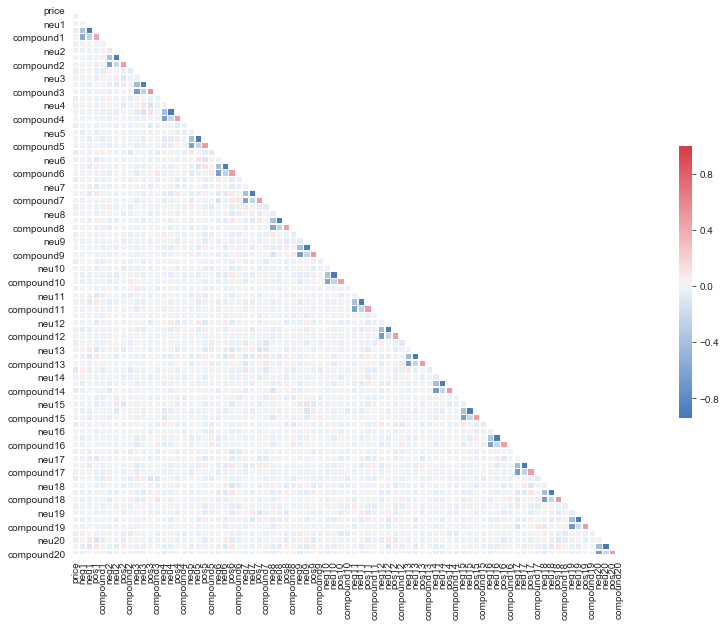

In [83]:
import seaborn as sns
#Plot the correlatiojn heatmap with the data w/out dummies
CorrMtx(df.corr(),dropDuplicates = True)

In [42]:
x = df
y = labels

#### Train test split and SMOTE

In [43]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = .2, random_state = 42)

In [44]:
print(y.rating.value_counts()) #Previous original class distribution
smote = SMOTE()
x_train_resampled, y_train_resampled = smote.fit_sample(x_train, y_train) 
print(pd.Series(y_train_resampled).value_counts()) #Preview synthetic sample class distribution

0.0    1067
1.0     558
Name: rating, dtype: int64
1.0    848
0.0    848
dtype: int64


/Users/fabricemesidor/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Helpers and Dummy

In [45]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier 

In [46]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))

In [47]:
from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy = 'uniform')
dummy.fit(x_train_resampled, y_train_resampled)
dummypred = dummy.predict(x_test)
print_metrics(y_test, dummypred)

Precision Score: 0.36363636363636365
Recall Score: 0.5660377358490566
Accuracy Score: 0.5353846153846153
F1 Score: 0.44280442804428044


#### Logistic

In [85]:
# #1 fit a predict a logistic regression and show metrics
print('LOGISTIC\n')
print('-'*30)

logr = LogisticRegression()
logr.fit(x_train_resampled, y_train_resampled)
test_preds5=logr.predict(x_test)

print_metrics(y_test, test_preds5)

LOGISTIC

------------------------------
Precision Score: 0.4178082191780822
Recall Score: 0.5754716981132075
Accuracy Score: 0.6
F1 Score: 0.48412698412698413


/Users/fabricemesidor/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### KNN

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=8)
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
knnfit = knn.fit(x_train_resampled, y_train_resampled)
test_preds5 = knn.predict(x_test)
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels, preds)))
    print("Recall Score: {}".format(recall_score(labels, preds)))
    print("Accuracy Score: {}".format(accuracy_score(labels, preds)))
    print("F1 Score: {}".format(f1_score(labels, preds)))
    
print_metrics(y_test, test_preds5)

Precision Score: 0.3693181818181818
Recall Score: 0.6132075471698113
Accuracy Score: 0.5323076923076923
F1 Score: 0.46099290780141844


#### Decision Tree

In [57]:
clf= DecisionTreeClassifier(criterion='entropy')
clf.fit(x_train_resampled,y_train_resampled) 
dtree_pred = clf.predict(x_test)

In [58]:
print_metrics(y_test,dtree_pred)

Precision Score: 0.417910447761194
Recall Score: 0.5283018867924528
Accuracy Score: 0.6061538461538462
F1 Score: 0.4666666666666667


#### Bagging

In [59]:
bagged_tree =  BaggingClassifier(DecisionTreeClassifier(criterion='gini', max_depth=5), n_estimators=20)
clf = bagged_tree.fit(x_train_resampled, y_train_resampled)
bagged_pred = bagged_tree.predict(x_test)

In [60]:
print(classification_report(y_test, bagged_pred))

              precision    recall  f1-score   support

         0.0       0.73      0.64      0.68       219
         1.0       0.40      0.50      0.45       106

    accuracy                           0.60       325
   macro avg       0.57      0.57      0.57       325
weighted avg       0.62      0.60      0.61       325



#### Random Forest

In [61]:
forest = RandomForestClassifier(n_estimators=100, max_depth= 8, max_leaf_nodes = 8)
forest.fit(x_train_resampled, y_train_resampled)

RFpred = forest.predict(x_test)
print(confusion_matrix(y_test, RFpred))
print(classification_report(y_test, RFpred))

[[154  65]
 [ 60  46]]
              precision    recall  f1-score   support

         0.0       0.72      0.70      0.71       219
         1.0       0.41      0.43      0.42       106

    accuracy                           0.62       325
   macro avg       0.57      0.57      0.57       325
weighted avg       0.62      0.62      0.62       325



#### Adaboost

In [62]:
adaboost_clf = AdaBoostClassifier()
gbt_clf = GradientBoostingClassifier(learning_rate =.02)

In [63]:
adaboost_clf.fit(x_train_resampled, y_train_resampled)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [64]:
gbt_clf.fit(x_train_resampled, y_train_resampled)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.02, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [65]:
adaboost_train_preds = adaboost_clf.predict(x_train_resampled)
adaboost_test_preds = adaboost_clf.predict(x_test)
gbt_clf_train_preds = gbt_clf.predict(x_train_resampled)
gbt_clf_test_preds = gbt_clf.predict(x_test)

In [66]:
def display_acc_and_f1_score(true, preds, model_name):
    acc = accuracy_score(true, preds)
    f1 = f1_score(true, preds, average = 'macro')
    print("Model: {}".format(model_name))
    print("Accuracy: {}".format(acc))
    print("F1-Score: {}".format(f1))
    
print("Training Metrics")
display_acc_and_f1_score(y_train_resampled, adaboost_train_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_train_resampled, gbt_clf_train_preds, model_name='Gradient Boosted Trees')
print("")
print("Testing Metrics")
display_acc_and_f1_score(y_test, adaboost_test_preds, model_name='AdaBoost')
print("")
display_acc_and_f1_score(y_test, gbt_clf_test_preds, model_name='Gradient Boosted Trees')

Training Metrics
Model: AdaBoost
Accuracy: 0.7836084905660378
F1-Score: 0.7836078134978812

Model: Gradient Boosted Trees
Accuracy: 0.8390330188679245
F1-Score: 0.8387005410580156

Testing Metrics
Model: AdaBoost
Accuracy: 0.5876923076923077
F1-Score: 0.5455209550843213

Model: Gradient Boosted Trees
Accuracy: 0.5969230769230769
F1-Score: 0.563445270443476


#### XGBoost

In [67]:
clf = xgb.XGBClassifier()
xgb = clf.fit(np.array(x_train_resampled), np.array(y_train_resampled))
training_preds = clf.predict(np.array(x_train_resampled))
xgb_preds = clf.predict(np.array(x_test))
training_accuracy = accuracy_score(np.array(y_train_resampled), training_preds)
val_accuracy = accuracy_score(np.array(y_test), xgb_preds)

In [68]:
print(classification_report(y_test, xgb_preds))

              precision    recall  f1-score   support

         0.0       0.72      0.74      0.73       219
         1.0       0.43      0.42      0.42       106

    accuracy                           0.63       325
   macro avg       0.58      0.58      0.58       325
weighted avg       0.63      0.63      0.63       325



In [89]:
from xgboost import XGBClassifier
from tpot import TPOTClassifier, TPOTRegressor
from deap.gp import Primitive

In [97]:
params = {'max_depth': np.arange(1,20,1),
          'learning_rate': np.arange(0.001,0.1,0.005),
          'n_estimators': np.arange(1,20,1),
          'nthread':[6],
          'gamma':np.arange(0.00001,0.1,0.00001),
          'subsample':np.arange(0.1,2,0.1),
          'reg_lambda': np.arange(0.1,20,1),
          'reg_alpha': np.arange(1,20,1),
          'min_child_weight': np.arange(1,20,1),
          'gamma': np.arange(0.1,2,0.1),
          'colsample_bytree': np.arange(0.1,2,0.1),
          'colsample_bylevel': np.arange(0.1,2,0.1)
         }

In [98]:
tpot_classifier = TPOTClassifier(generations=20, population_size=500, offspring_size=250,
                                verbosity=2, early_stop=8,
                                config_dict={'xgboost.XGBClassifier': params}, cv = 10, scoring = 'accuracy')
tpot_classifier.fit(x_train_resampled, y_train_resampled)

Generation 1 - Current best internal CV score: 0.7153641456582632
Generation 2 - Current best internal CV score: 0.7153641456582632
Generation 3 - Current best internal CV score: 0.7171008403361345
Generation 4 - Current best internal CV score: 0.7171008403361345
Generation 5 - Current best internal CV score: 0.7171008403361345
Generation 6 - Current best internal CV score: 0.7195238095238096
Generation 7 - Current best internal CV score: 0.7318977591036415
Generation 8 - Current best internal CV score: 0.7319397759103641
Generation 9 - Current best internal CV score: 0.7319397759103641
Generation 10 - Current best internal CV score: 0.7319397759103641
Generation 11 - Current best internal CV score: 0.7359943977591037
Generation 12 - Current best internal CV score: 0.737219887955182
Generation 13 - Current best internal CV score: 0.737219887955182
Generation 14 - Current best internal CV score: 0.737219887955182
Generation 15 - Current best internal CV score: 0.737219887955182
Generati

TPOTClassifier(config_dict={'xgboost.XGBClassifier': {'colsample_bylevel': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                                                      'colsample_bytree': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9]),
                                                      'gamma': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9]...
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9])}},
               crossover_rate=0.1, cv=10, disable_update_check=False,
               early_stop=8, generations=20, max_eval_time_mins=5,
               max_time_mins=None, memory=None, mutation_rate=0.9, n_jobs=1,
               offspring_size=250, periodic_checkpoint_folder=None,
               population_size=500, random_state=None, scoring='accuracy',
               subsample=1.0, template=None, use_dask=Fa

In [99]:
args = {}
for arg in tpot_classifier._optimized_pipeline:
    if type(arg) != Primitive:
        try:
            if arg.value.split('__')[1].split('=')[0] in ['max_depth', 'n_estimators', 'nthread','min_child_weigh']:
                args[arg.value.split('__')[1].split('=')[0]] = int(arg.value.split('__')[1].split('=')[1])
            else:
                args[arg.value.split('__')[1].split('=')[0]] = float(arg.value.split('__')[1].split('=')[1])
        except:
            pass
params = args

In [100]:
xgb = XGBClassifier(**params)
xgb_tp = xgb.fit(x_train_resampled, y_train_resampled)

In [103]:
training_preds = xgb.predict(np.array(x_train_resampled))
xgb_tp_preds = xgb.predict(np.array(x_test))
training_accuracy = accuracy_score(np.array(y_train_resampled), training_preds)
val_accuracy = accuracy_score(np.array(y_test), xgb_tp_preds)

In [104]:
print(classification_report(y_test, xgb_tp_preds))

              precision    recall  f1-score   support

         0.0       0.72      0.74      0.73       219
         1.0       0.43      0.41      0.42       106

    accuracy                           0.63       325
   macro avg       0.57      0.57      0.57       325
weighted avg       0.63      0.63      0.63       325



#### SVM

In [75]:
from sklearn import svm

clf = svm.SVC(kernel='linear', C=5)
clf.fit(np.array(x_train_resampled), np.array(y_train_resampled))
svcy_pred = clf.predict(x_test)

In [76]:
print(classification_report(y_test,svcy_pred))

              precision    recall  f1-score   support

         0.0       0.77      0.58      0.66       219
         1.0       0.42      0.63      0.51       106

    accuracy                           0.60       325
   macro avg       0.59      0.61      0.58       325
weighted avg       0.65      0.60      0.61       325

